# Data Collection Phase

In this phase , data is collected from various social media sites like Twitter and Reddit.

## 1. Collecting Data from Twitter using tweepy API

In [10]:
import tweepy
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
 
import twitter_credentials
import numpy as np
import pandas as pd
# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
        auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)


class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        #df['id'] = np.array([tweet.id for tweet in tweets])
        #df['len'] = np.array([len(tweet.text) for tweet in tweets])
        #df['date'] = np.array([tweet.created_at for tweet in tweets])
        #df['source'] = np.array([tweet.source for tweet in tweets])
        #df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        #df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    #tweets = api.user_timeline(screen_name="AUSvIND", count=500)
    search_words = ["#INDvsAUS ", "#indvsaus"]

    date_since = "2020-01-01"

    tweets = tweepy.Cursor(api.search, search_words,
                       geocode="20.5937,78.9629,3000km",
                       lang="en", since=date_since).items(100)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    
    print(df.head(100))
    #df.to_pickle('tweets.pkl')
    df.to_csv('twitterdata.csv')

                                               Tweets
0   @amenners Is he trying for Bollywood?😂\nWhy am...
1   Upcoming Series of Ind vs Aus will be a cracki...
2   RT @sportsflashes: Recent words from Australia...
3   Recent words from Australian Wicketkeeper, #Ma...
4   RT @Bhai_saheb: Ashwin's WhatsApp showing 'Las...
5   RT @ITGDsports: #INDvsAUS | "It is the marquee...
6   RT @ITGDsports: #INDvsAUS | "It is the marquee...
7   #INDvsAUS | "It is the marquee series of the y...
8   RT @Gajal_Dalmia: Just look at him 🔥 🔥\nHe can...
9   RT @dna: 'You don’t want to get him more aggre...
10  'You don’t want to get him more aggressive': R...
11  RT @Bhai_saheb: Ashwin's WhatsApp showing 'Las...
12  @shashankv76 2-1 each against Aus😇\n#Cricket #...
13  RT @cricalytics: Who would you rather have as ...
14  Who would you rather have as a backup opener f...
15  @TheJinxyyyy TBH i m waiting for #INDVsAUS mor...
16  RT @ysjagan: Kudos to the Indian Women's Crick...
17  RT @ysjagan: Kudos to th

## 2. Collecting data from Reddit using Praw API

In [ ]:
import praw
import pandas as pd
from praw.models import MoreComments
reddit = praw.Reddit(client_id='MjOYmV5QB4Q8bw', client_secret='Ha-Bem-WhpBXOFu6sQExGW1u760', user_agent='Scraping Example')

"""
# get 10 hot posts from the MachineLearning subreddit
hot_posts = reddit.subreddit('Cricket').hot(limit=10)
for post in hot_posts:
    print(post.title)
"""
#comments = []
comments=""
submission = reddit.submission(id="f1zmjl")
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    comments = comments + top_level_comment.body
    #comments.append([top_level_comment.body])
#comments = pd.DataFrame(comments,columns=['comment'])
print(comments)
#comments.to_pickle('redditdataset.pkl')
comments.to_csv('redditdataset.csv', sep='.', encoding='utf-8', index=False)

# Data Processing Phase

Performing data mining algorithms on collected data to retrieve information.



## Applying TF-IDF to collected dataset

In [17]:
with open('twitterdata.csv', 'r') as twitterfile:
    twittertext = twitterfile.readlines()
# Converting List to String
twitterdata = ' '.join(map(str, twittertext))
print(twitterdata)

,Tweets
 0,"@amenners Is he trying for Bollywood?😂
 Why am I getting this feeling that we won't see any BANTER this summer.… https://t.co/Sim2iZgFR5"
 1,"Upcoming Series of Ind vs Aus will be a cracking series, says Dravid!! https://t.co/h33QfKEaFq #Cricket finale… https://t.co/FN0uegxGSs"
 2,"RT @sportsflashes: Recent words from Australian Wicketkeeper, #MatthewWade on why the Aussies don't sledge @imVkohli, have opened debates o…"
 3,"Recent words from Australian Wicketkeeper, #MatthewWade on why the Aussies don't sledge @imVkohli, have opened deba… https://t.co/15BfeQJ1kL"
 4,RT @Bhai_saheb: Ashwin's WhatsApp showing 'Last spin at nagpur' #IndvsAus
 5,"RT @ITGDsports: #INDvsAUS | ""It is the marquee series of the year and there has been great build up. I am really hoping we will be back to…"
 6,"RT @ITGDsports: #INDvsAUS | ""It is the marquee series of the year and there has been great build up. I am really hoping we will be back to…"
 7,"#INDvsAUS | ""It is the marquee series of th

In [18]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
ttokenized_text=sent_tokenize(twitterdata)
ttokenized_word=word_tokenize(twitterdata)

,Tweets
 0,"@amenners Is he trying for Bollywood?😂
 Why am I getting this feeling that we won't see any BANTER this summer.… https://t.co/Sim2iZgFR5"
 1,"Upcoming Series of Ind vs Aus will be a cracking series, says Dravid!! https://t.co/h33QfKEaFq #Cricket finale… https://t.co/FN0uegxGSs"
 2,"RT @sportsflashes: Recent words from Australian Wicketkeeper, #MatthewWade on why the Aussies don't sledge @imVkohli, have opened debates o…"
 3,"Recent words from Australian Wicketkeeper, #MatthewWade on why the Aussies don't sledge @imVkohli, have opened deba… https://t.co/15BfeQJ1kL"
 4,RT @Bhai_saheb: Ashwin's WhatsApp showing 'Last spin at nagpur' #IndvsAus
 5,"RT @ITGDsports: #INDvsAUS | ""It is the marquee series of the year and there has been great build up. I am really hoping we will be back to…"
 6,"RT @ITGDsports: #INDvsAUS | ""It is the marquee series of the year and there has been great build up. I am really hoping we will be back to…"
 7,"#INDvsAUS | ""It is the marquee series of th

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/warlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
twitterfilter = []
for w in ttokenized_word:
    if w not in stop_words:
        twitterfilter.append(w)
td = ' '.join(map(str, twitterfilter))

In [5]:
import re
two = re.findall(r'\w+', td)
tdi = [i for i in two if not i.isdigit()]
tw = [i for i in tdi if len(i) > 1]
twitterdoc = ' '.join(map(str, tw))

In [6]:
with open('redditdataset.csv', 'r') as redditfile:
    reddittext = redditfile.readlines()
# Converting List to String
redditdata = ' '.join(map(str, reddittext))

In [7]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
tokenized_text=sent_tokenize(redditdata)
tokenized_word=word_tokenize(redditdata)

In [8]:
redditfilter = []
for w in tokenized_word:
    if w not in stop_words:
        redditfilter.append(w)
rd = ' '.join(map(str, redditfilter))

In [9]:
import re
rwo = re.findall(r'\w+', rd)
rdi = [i for i in rwo if not i.isdigit()]
fw = [i for i in rdi if len(i) > 1]
redditdoc = ' '.join(map(str, fw))

In [10]:
# Slicing the string into two to perform TF - IDF Algorithm
#str_one, str_two = filt_sent_string[:len(filt_sent_string)//2],filt_sent_string[len(filt_sent_string)//2:] 


In [11]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

document1 = tb(twitterdoc)

document2 = tb(redditdoc)

bloblist = [document1, document2]
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        #print("Word: {}, TF-IDF: {}".format(word, round(score, 5)))
        if not word.isdigit():
            print(word)

Top words in document 1
Tweets
amenners
Bollywood
BANTER
summer
Top words in document 2
So
worst
years
Saini
ODI


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [13]:
response = tfidf.fit_transform([twitterdoc, redditdoc])

In [14]:
tfidfwords = []
feature_names = tfidf.get_feature_names()
for col in response.nonzero()[1]:
    if not feature_names[col].isdigit() and len(feature_names[col]) > 3 and int((response[0, col]) * 100) % 10 != 0:
        print (feature_names[col], ' - ', response[0, col])
        tfidfwords.append(feature_names[col])

rock  -  0.016305531953760114
irritating  -  0.016305531953760114
starting  -  0.011601520279438516
news  -  0.011601520279438516
good  -  0.011601520279438516
finally  -  0.011601520279438516
mylovevirat18  -  0.016305531953760114
masterclass  -  0.016305531953760114
desertstorm  -  0.016305531953760114
best  -  0.011601520279438516
sachin_rt  -  0.016305531953760114
inning  -  0.011601520279438516
storm  -  0.016305531953760114
desert  -  0.016305531953760114
commentary  -  0.011601520279438516
greig  -  0.016305531953760114
tony  -  0.016305531953760114
e9fhdkxvvl  -  0.016305531953760114
played  -  0.011601520279438516
teamindia  -  0.016305531953760114
testcricket  -  0.016305531953760114
claim  -  0.016305531953760114
mclarke23  -  0.016305531953760114
dismisses  -  0.016305531953760114
aaronfinch5  -  0.016305531953760114
cricketnews  -  0.016305531953760114
edengarden  -  0.016305531953760114
hatrick  -  0.016305531953760114
imkuldeep18  -  0.016305531953760114
kkriders  -  0.0

given  -  0.011601520279438516
well  -  0.011601520279438516
always  -  0.023203040558877033
will  -  0.011601520279438516
birthday  -  0.011601520279438516
happy  -  0.011601520279438516
wt20  -  0.011601520279438516
knock  -  0.011601520279438516
genius  -  0.011601520279438516
here  -  0.023203040558877033
selected  -  0.03480456083831555
return  -  0.03480456083831555
international  -  0.011601520279438516
made  -  0.011601520279438516
starts  -  0.023203040558877033
ball  -  0.023203040558877033
misses  -  0.023203040558877033
interesting  -  0.0696091216766311
something  -  0.0696091216766311
mention  -  0.023203040558877033
option  -  0.023203040558877033
bowling  -  0.023203040558877033
seam  -  0.023203040558877033
extra  -  0.023203040558877033
role  -  0.011601520279438516
player  -  0.011601520279438516
innings  -  0.03480456083831555
what  -  0.03480456083831555
scored  -  0.023203040558877033
from  -  0.011601520279438516
till  -  0.011601520279438516
matches  -  0.011601

In [15]:
print("Fans Mostly discussed about : ",tfidfwords[:10])

Fans Mostly discussed about :  ['rock', 'irritating', 'starting', 'news', 'good', 'finally', 'mylovevirat18', 'masterclass', 'desertstorm', 'best']


In [ ]:
#combining the reddit & twitter data for retrieving key comments
finaldataset = twitterdata + redditdata
print(finaldataset)

In [ ]:
re.findall(r"([^.]*?kohli[^.]*\.)",finaldataset)

## Applying K-Means Clustering on Dataset

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [ ]:
finaldatatext = twittertext + reddittext

In [53]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(finaldatatext)

In [54]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [57]:
for i in range(true_k):
    print('\nCluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print( '%s' % terms[ind])


Cluster 0:
india
kohli
indvsaus
https
saini
series
rahul
like
just
colin

Cluster 1:
thakur
shardul
lord
fuck
ball
series
cunt
overs
gonna
country

Cluster 2:
nz
2020
series
iyer
shreyas
bumrah
vs
great
game
217


In [61]:
print('\n')
print('Prediction')
X = vectorizer.transform(["What is this life"])
predicted = model.predict(X)
print(predicted)



Prediction
[0]


# Sentiment Analysis using NLTK

In [35]:
import pandas as pd
messages = [line.rstrip() for line in open("redditdataset.csv")]
data = pd.read_csv("redditdataset.csv",sep="\n",names=["message"])

In [36]:
data["message"][1]
#just to check if datacorpus is loaded currectly.

'So this is the worst series of Kohli like in years.'

In [37]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/warlock/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
sid = SentimentIntensityAnalyzer()

In [40]:
summary = {"positive":0,"neutral":0,"negative":0}
for x in messages: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
    else:
        summary["negative"] +=1
print(summary)

{'positive': 206, 'neutral': 448, 'negative': 140}


In [41]:
type(summary)

dict

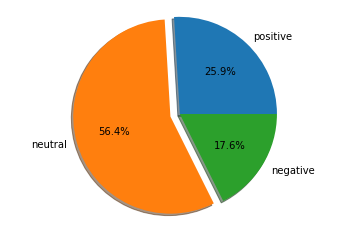

In [43]:
import matplotlib.pyplot as plt
labels = tuple(summary.keys())
sizes = list(summary.values())
explode = (0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')
plt.show()